In [1]:
import sys
import os
path = os.getcwd()
dir = os.path.abspath(os.path.join(path, os.pardir))
sys.path.append(dir)

In [2]:
import numpy as np

In [3]:
from lenstronomy.LensModel.lens_model import LensModel
import lensinggw.constants.constants as const

In [4]:
from plot.plot import plot_contour
import amplification_factor_trial.amplification_factor as af

In [5]:
G = const.G  # gravitational constant [m^3 kg^-1 s^-2]
c = const.c  # speed of light [m/s]
M_sun = const.M_sun  # Solar mass [Kg]

coordinates in scaled units [x (radians) /thetaE_tot]

In [6]:
y0, y1 = 0.5, 0 # source position
l0, l1 = 0., 0 # lens position

zS = 1.0 # source redshift
zL = 0.5 # lens redshift

In [22]:
mL1 = 100

# convert to radians
from lensinggw.utils.utils import param_processing
thetaE = param_processing(zL, zS, mL1)

In [23]:
beta0, beta1 = y0 * thetaE, y1 * thetaE
eta10, eta11 = 0 * l0 * thetaE, 0 * l1 * thetaE

In [24]:
lens_model_list = ['SIS']
kwargs_sis_1 = {'center_x': eta10, 'center_y': eta11, 'theta_E': thetaE}
kwargs_lens_list = [kwargs_sis_1]

In [25]:
kwargs_sis_1_scaled = {'center_x': eta10 / thetaE, 'center_y': eta11 / thetaE, 'theta_E': thetaE / thetaE}
kwargs_lens_list_scaled = [kwargs_sis_1_scaled]

In [26]:
lens_model_complete = LensModel(lens_model_list=lens_model_list)
T = lens_model_complete.fermat_potential
T0 = thetaE ** (-2) * T(eta10, eta11, kwargs_lens_list, beta0, beta1)#[0]
Tscale = 4 * (1 + zL) * mL1 * M_sun * G / c ** 3
print('T0 = {}'.format(T0))
print('Tscale = {}'.format(Tscale))

T0 = 0.125
Tscale = 0.0029552946153261453


In [27]:
kwargs_macro = {'source_pos_x': beta0,
                'source_pos_y': beta1,
                'theta_E': thetaE
               }

In [28]:
# Define the characteristic WindowSize
mL2 = 10
thetaE2 = param_processing(zL, zS, mL2)

kwargs_integrator = {'PixelNum': int(20000),          # Number of pixels on each side of the window
                     'PixelBlockMax': 2000,           # Dividing PixelNum into PixelBlock
                     'WindowSize': 210*thetaE2, 
                     'WindowCenterX': eta10, 
                     'WindowCenterY': eta11,
                     'T0': T0,                        # Time delay of the reference point (WindowCenter)
                     'TimeStep': 1e-5/Tscale,         # integration step in time domain
                     'TimeMax': T0 + 1/Tscale,        # Upper bound of time integration
                     'TimeMin': T0 - .1/Tscale,       # Lower bound of time integration
                     'TimeLength': 4/Tscale,          
                     'TExtend': 10/Tscale,            # Extend the time domain curve to desired time. In this example, it is extended to T0+10 seconds 
                     'Tscale': Tscale}                

Integrating...: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:10<00:00, 11.28it/s]


parameters 2000 0 -2.673874141782764e-09 -2.673874141782764e-09 5.348015684349745e-10 110001 -33.71257391950042 338.5075067097881 8.052888061582412e-11 [{'center_x': 0.0, 'center_y': 0.0, 'theta_E': 8.052888061582412e-11}] 4.026444030791206e-11 0.0 2.6740078421748727e-13
9667 1 trimmed 110001
110001
trim 9667 1
100333 len


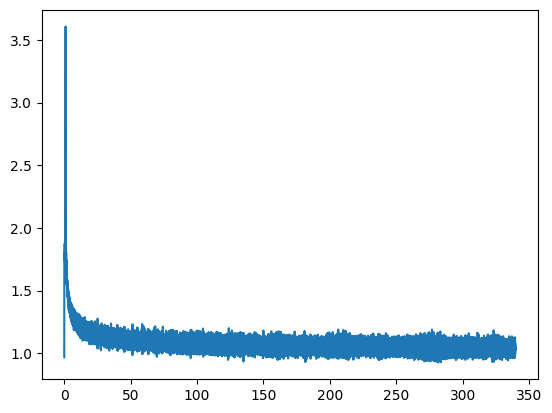

b4 extend 0.0 0.003395053193608889
0.003383757391950042 dt
100333 3383.757391950042 extension
339.50870311828083 3383.75400819265 1299666 key


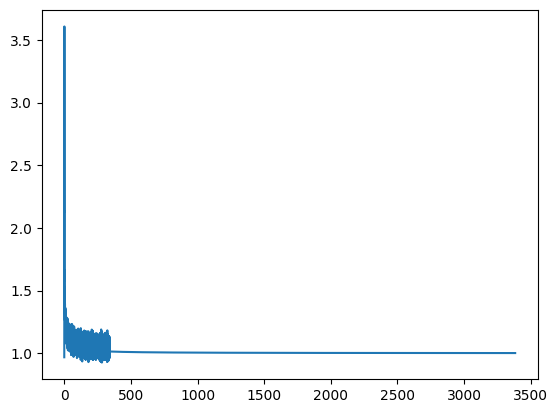

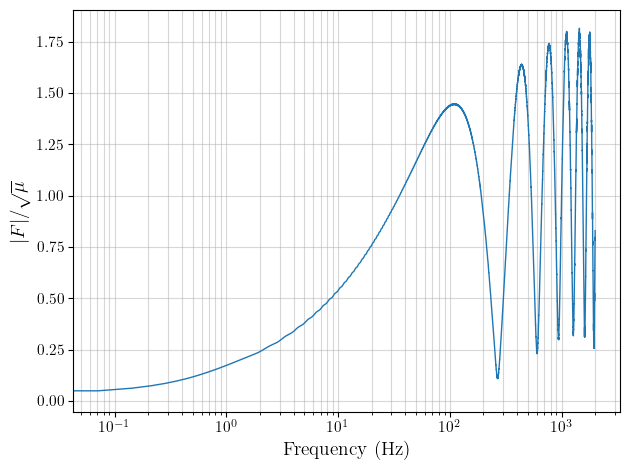

In [29]:
amplification = af.amplification_factor_fd(lens_model_list=lens_model_list, kwargs_lens=kwargs_lens_list, kwargs_macro=kwargs_macro, **kwargs_integrator)
ws, Fws = amplification.integrator(embedded=False)
amplification.plot()